In [200]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [201]:
def initiate(data,k):
    index=random.sample(range(len(data)),k)
    init_centroids={}
    for i in range(k):
        init_centroids[i]=data[index[i]]
    return init_centroids

In [202]:
def find_centroid(clusters):
    centroids={}
    for num in clusters:
        centroids[num]=np.mean(clusters[num],axis=0)
    return centroids        

In [203]:
def cal_distance(point,centroid):
    return np.sum((point-centroid)**2)

In [204]:
def distance_to_cluster(points,centroids):
    group=[]
    for point in points:
        distances=[]
        for i in centroids:
            distances.append(cal_distance(point,centroids[i]))
        group.append(np.argmin(distances))
    clusters={}
    for i in range(len(group)):
        clusters[group[i]]=[]
    for i in range(len(group)):
        clusters[group[i]].append(points[i])  
    for i in clusters:
        clusters[i]=np.array(clusters[i])
    return clusters            

In [205]:
def kmeans(k,data,t):
    centroids=initiate(data,k)
    points=data
    itertimes=1
    while itertimes<t:
        clusters=distance_to_cluster(points,centroids)
        centroids=find_centroid(clusters)
        itertimes+=1
    return clusters    

In [206]:
#this is the test data
data=np.array([[1,2],[2,3],[1.5,3],[5,2],[1,4],[6,3],[2,4],[7,4.5],[5,5],[2.5,3],[3,5],[6,4],[8,5],[2,6],[8,3],[5,7],[1,6],[3,2],[6,6.5],[7,7.5]])

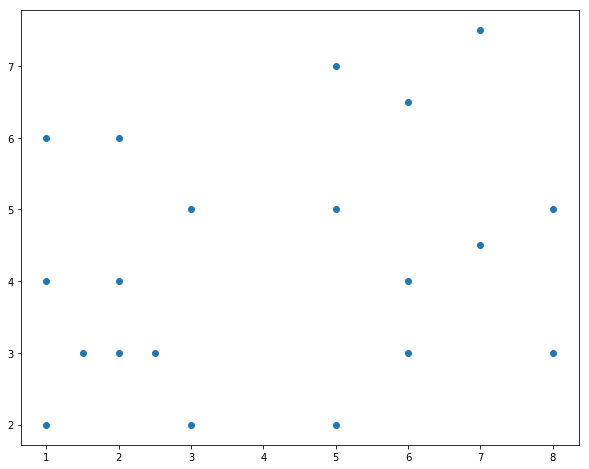

In [207]:
fig=plt.figure(figsize=(10,8))
plt.scatter(data[:,0],data[:,1])

In [224]:
clusters=kmeans(2,data,30)

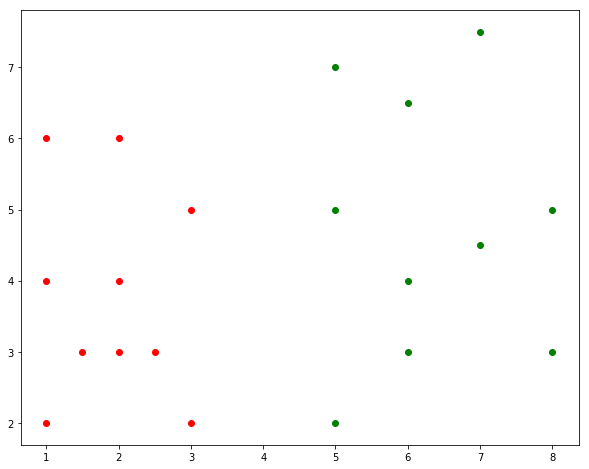

In [225]:
fig=plt.figure(figsize=(10,8))
plt.scatter(clusters[0][:,0],clusters[0][:,1],color='red')
plt.scatter(clusters[1][:,0],clusters[1][:,1],color='green')

In [226]:
clusters

{0: array([[1. , 2. ],
        [2. , 3. ],
        [1.5, 3. ],
        [1. , 4. ],
        [2. , 4. ],
        [2.5, 3. ],
        [3. , 5. ],
        [2. , 6. ],
        [1. , 6. ],
        [3. , 2. ]]), 1: array([[5. , 2. ],
        [6. , 3. ],
        [7. , 4.5],
        [5. , 5. ],
        [6. , 4. ],
        [8. , 5. ],
        [8. , 3. ],
        [5. , 7. ],
        [6. , 6.5],
        [7. , 7.5]])}